# Лабораторная 4: Проверка статистических гипотез

## Задание 1: Простые гипотезы

### Пункт 1: Проверка гипотезы о том, что средние 2х выборок равны

#### 1.1.1) Построим две несвязанные выборки: $x^{(1)} \in N(5, 7), n_1 = 200$ и $x^{(2)} \in N(5, 9), n_2 = 300$:

In [295]:
import numpy as np

distr1 = np.random.normal(loc=5, scale=7 ** 0.5, size=200)
distr2 = np.random.normal(loc=5, scale=9 ** 0.5, size=300)


Проверим гипотезу на равенство средних, будем использовать T-критерий:

In [296]:
import scipy.stats as st

# Вычисляем исправленную дисперсию
disp1 = distr1.var(ddof=1)
disp2 = distr2.var(ddof=1)

# Вычисляем некую исправленную дисперсию двух дисперсий:
sko_super = (((distr1.size - 1) * disp1 + (distr2.size - 1) * disp2) / (distr1.size + distr2.size - 2)) ** 0.5

# Вычисляем величину, которая должна подчиняться распределению Стьюдента. За счет этого мы можем узнать равны ли средние
t_criteria = (distr1.mean() - distr2.mean()) / (sko_super * (1 / distr1.size + 1 / distr2.size) ** 0.5)

# Вводим ошибку первого рода (вероятность отбросить правильную гипотезу):
alpha = 0.05
# Вычисляем доверительный интервал для распределения Стьюдента. Если t_criteria  попадает в этот интервал, то гипотеза выполняется.
df = distr1.size + distr2.size - 2
a = st.t.ppf(df=df, q=alpha / 2)
b = st.t.ppf(df=df, q=1 - alpha / 2)

print(f"[{a}; {b}], H criteriy = {t_criteria}")
# TODO: Группирование

[-1.9647389829672652; 1.9647389829672648], H criteriy = 0.21676417432449635


#### 1.1.2) Построим две связанные выборки: $x \in N(3, 12)$, $y = x + \epsilon, \epsilon = 0.1 * uniform([-6, 6])$

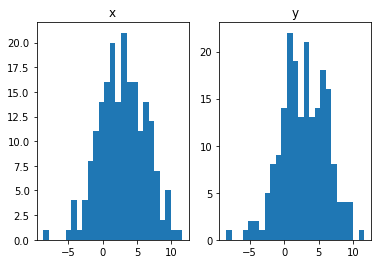

In [297]:
from matplotlib import pyplot as plt


def get_y_mass(x_mass, noise_func):
    y_mass = []
    epsilon = 0.1
    for el in x_mass:
        y_mass.append(el + epsilon * noise_func())
    return np.array(y_mass)


distr1 = np.random.normal(loc=3, scale=12 ** 0.5, size=200)

# [loc; loc + scale]
distr2 = get_y_mass(distr1, lambda: st.uniform.rvs(loc=-6, scale=12))

fig, (plt_x, plt_y) = plt.subplots(1, 2)
plt_x.hist(distr1, bins=25)
plt_x.set_title("x")
plt_y.hist(distr2, bins=25)
plt_y.set_title("y")

plt.show()

Теперь будем проверять гипотезу равенства средних для этих двух случайных величин (поскольку величины связанные гипотезы проверяются по-другому, $H_0 := \overline Z = 0, H_1 := \overline Z \neq 0$):

In [298]:
z = [distr1[i] - distr2[i] for i in range(distr1.size)]
z_mean = sum(z) / len(z)
s_z = (1 / (len(z) - 1) * sum([(z[i] - z_mean) ** 2 for i in range(len(z))])) ** 0.5
t_criteria = (z_mean * len(z) ** 0.5) / s_z

# Вводим ошибку первого рода (вероятность отбросить правильную гипотезу):
alpha = 0.05
# Вычисляем доверительный интервал для распределения Стьюдента. Если t_criteria  попадает в этот интервал, то гипотеза выполняется.
df = len(z) - 1
a = st.t.ppf(df=df, q=alpha / 2)
b = st.t.ppf(df=df, q=1 - alpha / 2)
print(f"[{a}; {b}], H criteriy = {t_criteria}")

[-1.9719565442493954; 1.971956544249395], H criteriy = -0.3053642570314645


### Пункт 2: Пуассон P(9) делится пополам и проверяется гипотеза о том, что параметр правой половины равен параметру левой.

In [299]:
# Создадим выборку:
poisson_distr = st.poisson.rvs(mu=9, size=200)
first_half = poisson_distr[:len(poisson_distr) // 2]
second_half = poisson_distr[len(poisson_distr) // 2:]

alpha = 0.05
h_criteria = (first_half.mean() - second_half.mean()) / (first_half.mean() + second_half.mean()) ** 0.5
a = st.norm.ppf(q=alpha / 2)
b = -a

print(f"[{a}; {b}], H criteriy = {h_criteria}")

[-1.9599639845400545; 1.9599639845400545], H criteriy = -0.13957263155977057


### Пункт 3: Проверить гипотезу о том, что дисперсии равны по критерию Фишера
#### 1.3.1) Две несвязанные выборки, данные взять такие же, как в пункте 1

In [300]:
distr1 = np.random.normal(loc=5, scale=7 ** 0.5, size=200)
distr2 = np.random.normal(loc=5, scale=9 ** 0.5, size=300)

Величина $\frac{s_{(1)}^2}{s_{(2)}^2}$ должна подчиняться распределению Фишера $F_{n_1 - 1, n_2 - 1}$

In [301]:
h_criteria = distr1.var(ddof=1) / distr2.var(ddof=1)
alpha = 0.05
dfn = distr1.size - 1
dfd = distr2.size - 1
a = st.f.ppf(dfn=dfn, dfd=dfd, q=alpha / 2)
b = st.f.ppf(dfn=dfn, dfd=dfd, q=1 - alpha / 2)

print(f"[{a}; {b}], H criteriy = {h_criteria}")

[0.7729893672926245; 1.285204934412516], H criteriy = 0.7809772981058319


#### 1.3.2) $N(5, 9), n = 300$ делим пополам, проверяем гипотезу о том, что у половинок равны дисперсии.

In [302]:
distr = np.random.normal(loc=5, scale=9 ** 0.5, size=300)
first_half = distr[:len(distr) // 2]
second_half = distr[len(distr) // 2:]
h_criteria = first_half.var(ddof=1) / second_half.var(ddof=1)
alpha = 0.05
dfn = first_half.size - 1
dfd = second_half.size - 1
a = st.f.ppf(dfn=dfn, dfd=dfd, q=alpha / 2)
b = st.f.ppf(dfn=dfn, dfd=dfd, q=1 - alpha / 2)

print(f"[{a}; {b}], H criteriy = {h_criteria}")

[0.7244337450679404; 1.3803884852247126], H criteriy = 1.0116376513214176


### Пункт 4: проверка гипотезы о корреляции двух величин
Данные берем, как в пункте 1.1.2: $x \in N(3, 12)$, $y = x + \epsilon, \epsilon = 0.1 * uniform([-6, 6])$
$H_0 = \{p = 0\}$

In [320]:
distr1 = np.random.normal(loc=3, scale=12 ** 0.5, size=200)
# [loc; loc + scale]
distr2 = get_y_mass(distr1, lambda: st.uniform.rvs(loc=-6, scale=12))

# Посчитаем выборочный коэффициент корреляции
mean1 = distr1.mean()
mean2 = distr2.mean()
p = sum([(distr1[i] - mean1) * (distr2[i] - mean2) for i in range(distr1.size)]) / (
        distr1.var() * distr1.size * distr2.var() * distr2.size) ** 0.5

df = distr1.size - 2
h_criteria = p * df ** 0.5 / (1 - p ** 2) ** 0.5
alpha=0.05
a = st.t.ppf(df=df, q=alpha/2)
b = -a

# Если попадаем в этот интервал, то гипотеза о том, что корреляция равна 0 истинна.
print(f"[{a}; {b}], H criteriy = {h_criteria}")

[-1.972017477833896; 1.972017477833896], H criteriy = 164.34032386346465
